# Econométrie
Les facteurs de la variation de la consommation des ménages sur un aspect macro-économique

_______

On suppose que le taux de croissance de la consommation des ménages dépend du taux de la croissance du chômage, du taux d'épargne, du taux d’inflation, du taux de croissance du PIB et du taux de revenu brut.

Cette spécifiaction se traduit par:
$$ \textrm{CONSO} \sim \beta_0 + \textrm{CHOM}\, \beta_1 + \textrm{EPARGNE}\, \beta_2 + \textrm{INFL}\, \beta_3 + \textrm{PIB}\, \beta_4 + \textrm{REVENU}\, \beta_5$$

Nous analyserons les données de 92 pays sur la croissance de 2015 par rapport à 2014, dont la variable dépendante, CONSO, est le taux de croissance de consommation des ménages, avec les variables exogènes suivantes:

- CHOM: croissance du taux de chômage
- EPARGNE: croissance du taux d'épargne par revenu
- INFL: croissance de l'inflation mesurée par l'indice des prix à la consommation
- PIB: taux de croissance du PIB par habitant
- REVENU: taux de croissance des revenus par habitant

Avec $\beta_0$ qui exprime la croissance de la consommation quand ces variables exogènes ne varient pas. On peut l'interpréter comme la *consommation incompressible* des ménages.

Les données brutes, séparées, proviennent de la base de données de la [banque mondiale](https://donnees.banquemondiale.org/).
Elles ont été fusionnées et prétraitées en amont pour pouvoir se concentrer sur l'analyse dans ce notebook.


## Description des données
Les variables sont *globalement* centrées.  
Les variances des taux de croissance de la consommation, de l'inflation, du PIB et du revenu ne sont pas grandes entre les 92 pays. Le chômage a une croissance généralement négative, ce qui va dans le sens de la décroissance du taux de chômage mondial depuis 2010.

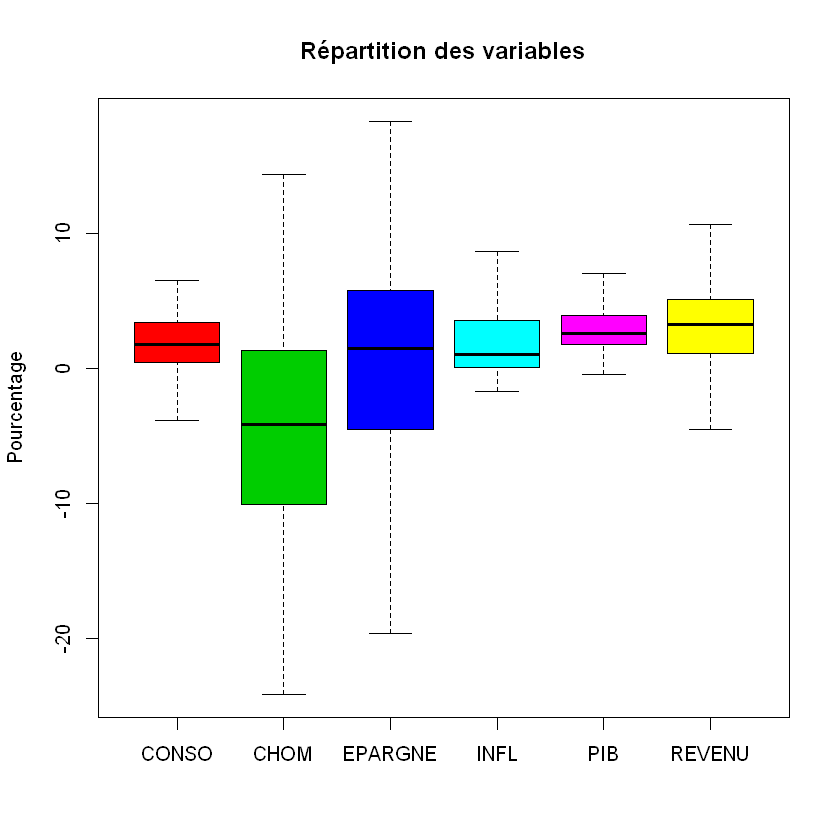

In [1]:
source("pretraitement.R")
boxplot(data,
        outline = F,
        main = "Répartition des variables",
        ylab = "Pourcentage",
        col = 2:7
       )

In [2]:
data.frame(cor(data))

,CONSO,CHOM,EPARGNE,INFL,PIB,REVENU
CONSO,1.0000000,-0.14529775,-0.42985702,-0.6718814,0.5659315,0.4754999
CHOM,-0.1452978,1.00000000,-0.04662159,0.1497346,-0.1201581,-0.0229188
EPARGNE,-0.4298570,-0.04662159,1.00000000,0.2838473,-0.1203895,0.2690605
INFL,-0.6718814,0.14973463,0.28384732,1.0000000,-0.4568895,-0.3509637
PIB,0.5659315,-0.12015811,-0.12038954,-0.4568895,1.0000000,0.4389652
REVENU,0.4754999,-0.02291880,0.26906051,-0.3509637,0.4389652,1.0000000


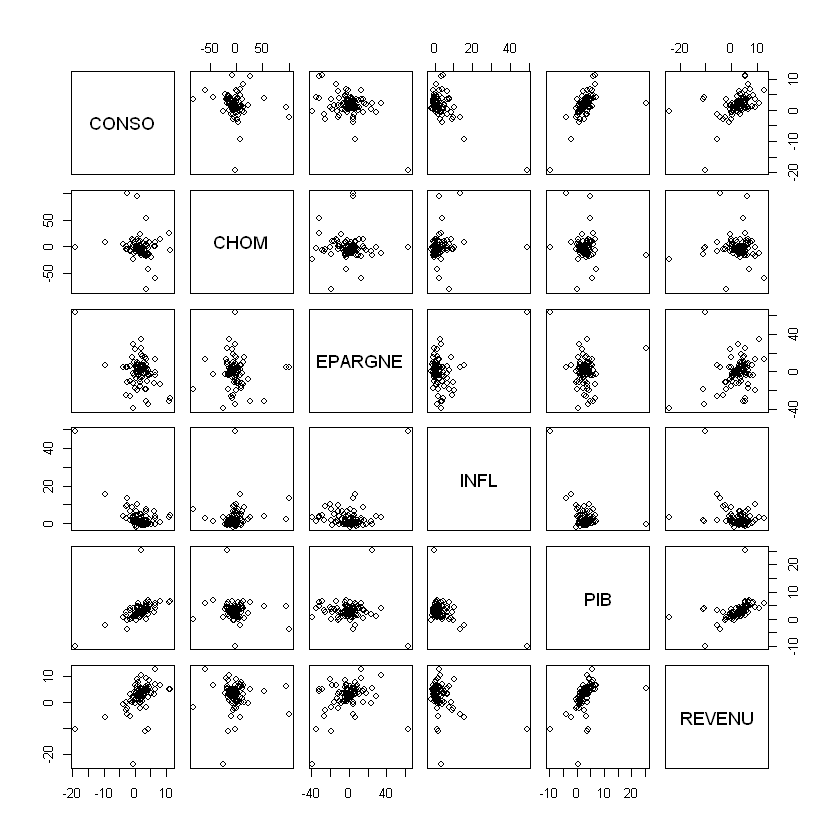

In [3]:
plot(data)

In [4]:
model1 <- lm(CONSO~., data = data)
summary(model1)


Call:
lm(formula = CONSO ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8309 -0.8932 -0.1623  1.2987  5.3982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.78023    0.36283   2.150   0.0343 *  
CHOM        -0.01458    0.01009  -1.445   0.1520    
EPARGNE     -0.10609    0.01695  -6.261 1.45e-08 ***
INFL        -0.19184    0.04492  -4.271 5.00e-05 ***
PIB          0.20384    0.07794   2.616   0.0105 *  
REVENU       0.29158    0.05454   5.347 7.28e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.014 on 86 degrees of freedom
Multiple R-squared:  0.7018,	Adjusted R-squared:  0.6845 
F-statistic: 40.48 on 5 and 86 DF,  p-value: < 2.2e-16


In [5]:
model2 <- lm(CONSO~EPARGNE+INFL+REVENU, data = data)
summary(model2)


Call:
lm(formula = CONSO ~ EPARGNE + INFL + REVENU, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5119 -1.1477 -0.1693  1.2965  6.0882 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.40755    0.30781   4.573 1.56e-05 ***
EPARGNE     -0.10973    0.01733  -6.331 9.97e-09 ***
INFL        -0.23621    0.04443  -5.316 7.93e-07 ***
REVENU       0.33742    0.05272   6.400 7.32e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.101 on 88 degrees of freedom
Multiple R-squared:  0.6681,	Adjusted R-squared:  0.6568 
F-statistic: 59.05 on 3 and 88 DF,  p-value: < 2.2e-16


In [6]:
anova(model1, model2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
86,349.0042,NA,NA,NA,NA
88,388.4294,-2,-39.42519,4.857486,0.01002995


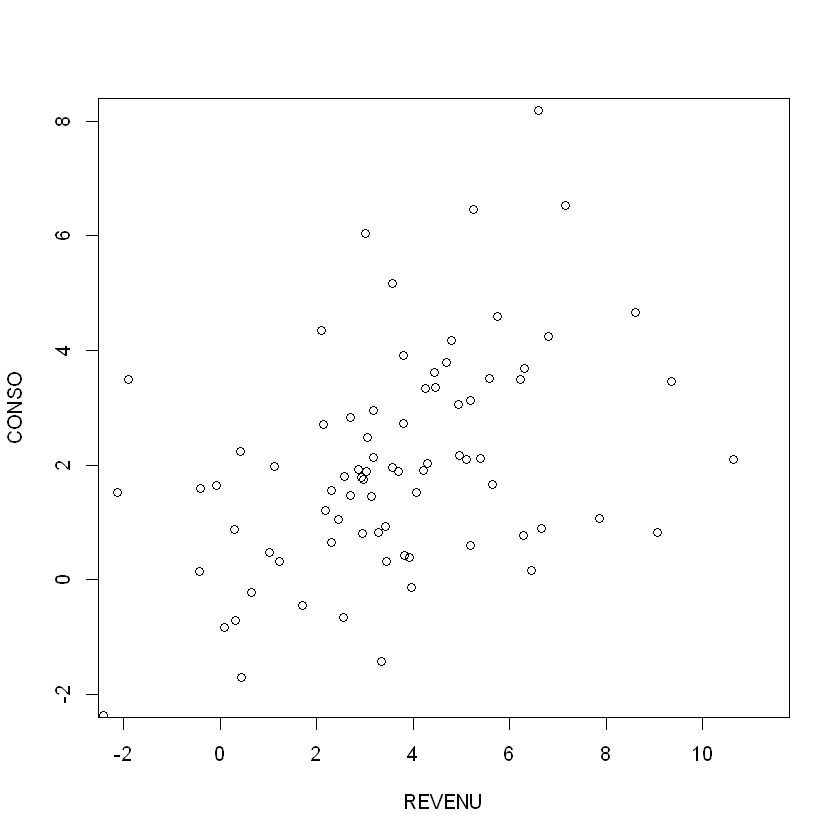

In [7]:
plot(CONSO~REVENU, data = data,
     ylim = c(-2, 8),
     xlim = c(-2, max(CONSO))
    )